<a href="https://colab.research.google.com/github/sayandas96476/gemstone-identification-using-deep-learning-approach/blob/main/gemstne_with_model_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
densenet = DenseNet201(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False, pooling='max')

In [ ]:
# freeze the weights
for layer in densenet.layers:
  layer.trainable=False

# add custom layers to the architecture
x = Flatten()(densenet.output)
prediction = Dense(87, activation='softmax')(x)

In [ ]:
model = Model(inputs=densenet.input, outputs = prediction)

In [ ]:
checkpoint_path=checkpoint_path="/content/drive/MyDrive/densenet/weights.ckpt"
checkpoint = tf.train.Checkpoint(model=model)

# Restore the checkpoint
checkpoint.restore(checkpoint_path).expect_partial()

checkpoint = tf.train.Checkpoint(model=model)

# Restore the checkpoint
checkpoint.restore(checkpoint_path).expect_partial()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # DenseNet201 default size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess input (convert pixels to the range [-1, 1])
    img_array = tf.keras.applications.densenet.preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)

    return predictions

# Example usage:
image_path = "/content/drive/MyDrive/alexandrite_0.jpg"
predictions = predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [ ]:
predictions

array([[4.39880445e-04, 1.49912201e-03, 3.49948532e-05, 5.55144325e-05,
        5.11856888e-06, 2.56993255e-04, 2.53072955e-07, 1.99446481e-06,
        6.49281390e-07, 1.94732901e-02, 3.24625988e-04, 5.39229671e-03,
        3.80140613e-04, 2.01944495e-05, 6.24593394e-03, 8.90267074e-06,
        7.56828394e-03, 7.09239841e-02, 7.87573445e-05, 6.16266683e-04,
        2.14473461e-03, 9.48133675e-06, 4.86418003e-06, 1.05108842e-02,
        3.11018171e-04, 3.42881394e-04, 1.17242125e-04, 1.97599529e-05,
        1.07807309e-05, 2.39767214e-05, 2.14931279e-05, 1.32036766e-05,
        1.78728294e-06, 3.40703036e-06, 5.58093634e-05, 1.04924453e-04,
        5.18585184e-05, 1.22465778e-07, 2.13629246e-04, 4.65514631e-07,
        2.64235609e-07, 8.27462009e-06, 5.69564963e-06, 6.10854477e-04,
        2.39359438e-01, 1.47920991e-05, 4.28347136e-08, 1.31528912e-04,
        3.48274671e-06, 1.94084525e-04, 4.85501107e-04, 1.04519631e-05,
        1.20257937e-06, 7.18226147e-06, 1.16130432e-05, 4.004324

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions.size

87

In [ ]:
max_index = np.argmax(predictions)

print("Index of the maximum value:", max_index)

Index of the maximum value: 64


In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/ruby.jfif"
predictions = predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


In [ ]:
max_index = np.argmax(predictions)

print("Index of the maximum value:", max_index)

Index of the maximum value: 64


In [ ]:
print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}")


Top 5 predictions:
Index: 64, Probability: 0.5122
Index: 17, Probability: 0.4465
Index: 44, Probability: 0.0317
Index: 66, Probability: 0.0033
Index: 14, Probability: 0.0019


In [ ]:
print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}")


Top 5 predictions:
Index: 64, Probability: 0.3073
Index: 75, Probability: 0.2622
Index: 44, Probability: 0.2394
Index: 17, Probability: 0.0709
Index: 69, Probability: 0.0389


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

def predict_image(checkpoint, image_path, img_height=224, img_width=224):
    """
    Make predictions on a single image using the loaded model from checkpoint.

    Args:
        checkpoint: TensorFlow checkpoint containing the loaded model
        image_path: Path to the image file
        img_height: Required height for model input (default 224)
        img_width: Required width for model input (default 224)

    Returns:
        Prediction results
    """
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )

    # Convert image to array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Expand dimensions to match expected model input
    img_array = tf.expand_dims(img_array, 0)

    # Normalize pixel values
    img_array = img_array / 255.0

    # Make prediction using the model from checkpoint
    predictions = checkpoint.model.predict(img_array)

    return predictions

# Example usage
#image_path = "path/to/your/image.jpg"
image_path = "/content/drive/MyDrive/alexandrite_0.jpg"
predictions = predict_image(checkpoint, image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [ ]:
max_index = np.argmax(predictions)

print("Index of the maximum value:", max_index)

Index of the maximum value: 64


In [ ]:
print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}")


Top 5 predictions:
Index: 64, Probability: 0.6837
Index: 44, Probability: 0.0976
Index: 75, Probability: 0.0491
Index: 23, Probability: 0.0367
Index: 69, Probability: 0.0276


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_images(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # DenseNet201 default size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess input (convert pixels to the range [-1, 1])
    img_array = tf.keras.applications.densenet.preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)

    return predictions

# Example usage:
image_path = "/content/drive/MyDrive/alexandrite_0.jpg"
predictions = predict_images(image_path)
print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step

Top 5 predictions:
Index: 64, Probability: 0.3073
Index: 75, Probability: 0.2622
Index: 44, Probability: 0.2394
Index: 17, Probability: 0.0709
Index: 69, Probability: 0.0389


In [ ]:
!unzip -u /content/drive/MyDrive/train.zip -d /content

Archive:  /content/drive/MyDrive/train.zip
   creating: /content/train/Alexandrite/
  inflating: /content/train/Alexandrite/alexandrite_0.jpg  
  inflating: /content/train/Alexandrite/alexandrite_1.jpg  
  inflating: /content/train/Alexandrite/alexandrite_10.jpg  
  inflating: /content/train/Alexandrite/alexandrite_11.jpg  
  inflating: /content/train/Alexandrite/alexandrite_12.jpg  
  inflating: /content/train/Alexandrite/alexandrite_13.jpg  
  inflating: /content/train/Alexandrite/alexandrite_14.jpg  
  inflating: /content/train/Alexandrite/alexandrite_15.jpg  
  inflating: /content/train/Alexandrite/alexandrite_16.jpg  
  inflating: /content/train/Alexandrite/alexandrite_17.jpg  
  inflating: /content/train/Alexandrite/alexandrite_19.jpg  
  inflating: /content/train/Alexandrite/alexandrite_2.jpg  
  inflating: /content/train/Alexandrite/alexandrite_20.jpg  
  inflating: /content/train/Alexandrite/alexandrite_21.jpg  
  inflating: /content/train/Alexandrite/alexandrite_22.jpg  
  in

In [ ]:
train_path = '/content/train'


In [ ]:
# import all libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
BATCH_SIZE = 64
IMG_SIZE = 224
seed=123
input_shape = (IMG_SIZE,IMG_SIZE)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,\
rotation_range=15, shear_range=10,\
zoom_range=0.1, fill_mode='nearest', \
height_shift_range=0.05, width_shift_range=0.1)

In [ ]:

train_gen = train_datagen.flow_from_directory(subset='training',
                                              directory=train_path,
                                              target_size=input_shape,
                                              color_mode='rgb',
                                              classes=None,
                                              class_mode='categorical',
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              seed=seed,
                                              save_to_dir=None,
                                              save_prefix='',
                                              save_format='png',
                                              follow_links=False,
                                              interpolation='nearest')

Found 2313 images belonging to 87 classes.


Number of images:  2313


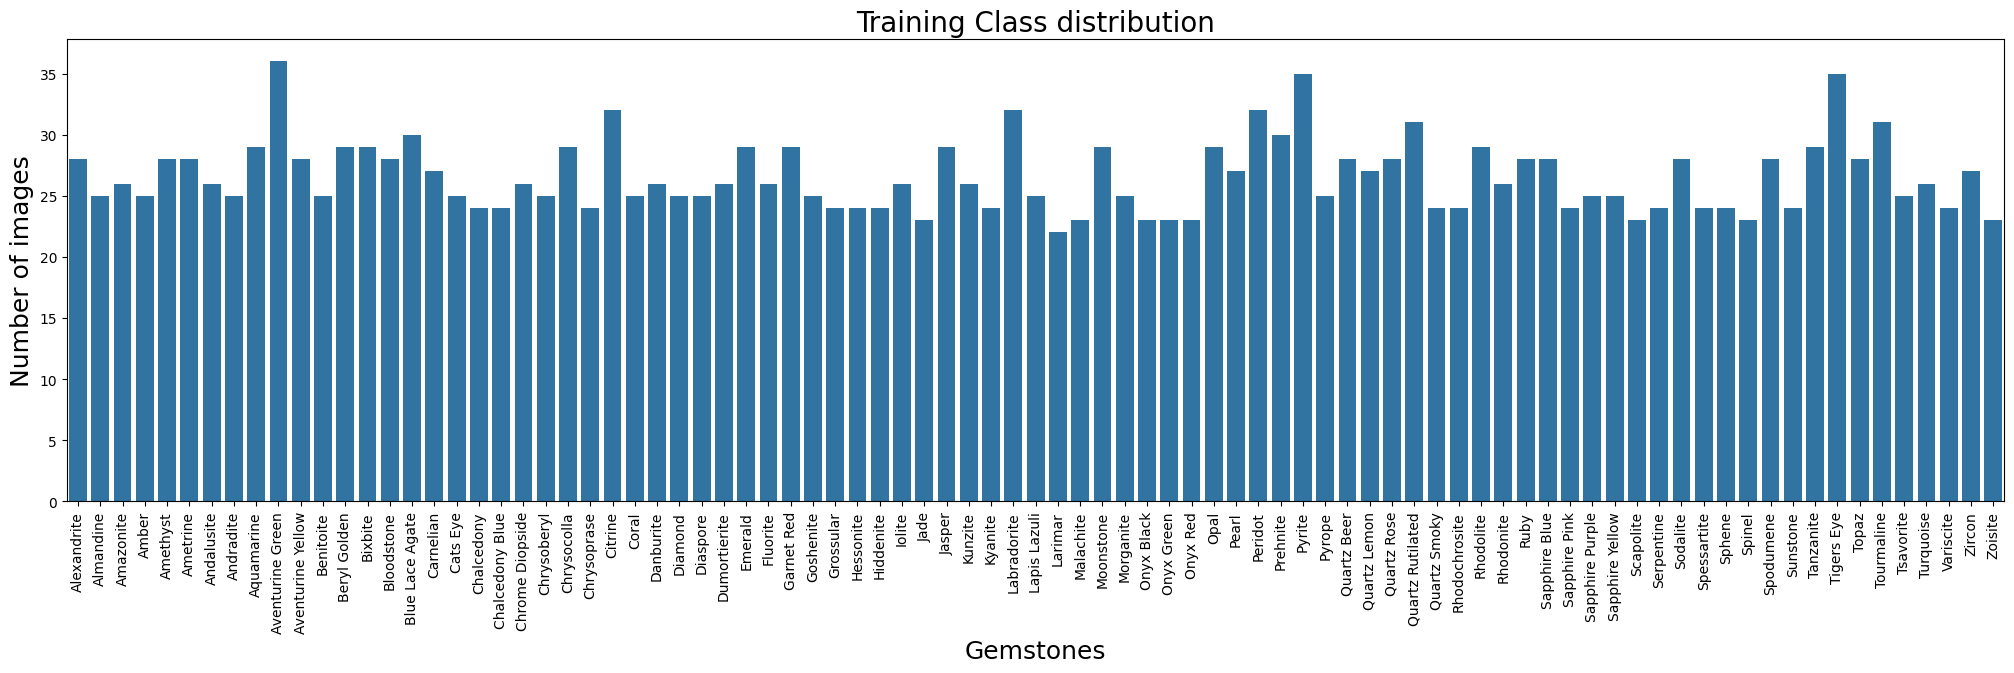

In [ ]:
n_classes=87
class_indices = train_gen.class_indices
temp_df = pd.DataFrame({'class': train_gen.classes}).value_counts().reset_index().sort_values(by='class')
temp_df.columns = ['class', 'counts']
plt.figure(figsize=(25,6))
sns.barplot(data=temp_df,
x='class',
y='counts')
plt.ylabel('Number of images', fontsize=18)
plt.xlabel('Gemstones', fontsize=18)
plt.title('Training Class distribution', fontsize=20)
plt.xticks(np.arange(len(class_indices)), labels=class_indices.keys(), rotation=90)
print('Number of images: ', np.sum(temp_df['counts'].values))


In [ ]:
temp_df

,class,counts
25,0,28
53,1,25
39,2,26
61,3,25
32,4,28
...,...,...
50,82,25
42,83,26
76,84,24
34,85,27


from matplotlib import pyplot as plt
temp_df['class'].plot(kind='hist', bins=20, title='class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['counts'].plot(kind='hist', bins=20, title='counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='class', y='counts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['class']
  ys = series['counts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('counts')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
temp_df['class'].plot(kind='line', figsize=(8, 4), title='class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['counts'].plot(kind='line', figsize=(8, 4), title='counts')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
labels=class_indices.keys()

In [ ]:
labels

dict_keys(['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'S

In [ ]:
type(labels)

dict_keys

In [ ]:
gemstone_list = list(labels)

print(gemstone_list)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

In [ ]:
gemstone_list

['Alexandrite',
 'Almandine',
 'Amazonite',
 'Amber',
 'Amethyst',
 'Ametrine',
 'Andalusite',
 'Andradite',
 'Aquamarine',
 'Aventurine Green',
 'Aventurine Yellow',
 'Benitoite',
 'Beryl Golden',
 'Bixbite',
 'Bloodstone',
 'Blue Lace Agate',
 'Carnelian',
 'Cats Eye',
 'Chalcedony',
 'Chalcedony Blue',
 'Chrome Diopside',
 'Chrysoberyl',
 'Chrysocolla',
 'Chrysoprase',
 'Citrine',
 'Coral',
 'Danburite',
 'Diamond',
 'Diaspore',
 'Dumortierite',
 'Emerald',
 'Fluorite',
 'Garnet Red',
 'Goshenite',
 'Grossular',
 'Hessonite',
 'Hiddenite',
 'Iolite',
 'Jade',
 'Jasper',
 'Kunzite',
 'Kyanite',
 'Labradorite',
 'Lapis Lazuli',
 'Larimar',
 'Malachite',
 'Moonstone',
 'Morganite',
 'Onyx Black',
 'Onyx Green',
 'Onyx Red',
 'Opal',
 'Pearl',
 'Peridot',
 'Prehnite',
 'Pyrite',
 'Pyrope',
 'Quartz Beer',
 'Quartz Lemon',
 'Quartz Rose',
 'Quartz Rutilated',
 'Quartz Smoky',
 'Rhodochrosite',
 'Rhodolite',
 'Rhodonite',
 'Ruby',
 'Sapphire Blue',
 'Sapphire Pink',
 'Sapphire Purple',
 '

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

def predict_image(checkpoint, image_path, img_height=224, img_width=224):
    """
    Make predictions on a single image using the loaded model from checkpoint.

    Args:
        checkpoint: TensorFlow checkpoint containing the loaded model
        image_path: Path to the image file
        img_height: Required height for model input (default 224)
        img_width: Required width for model input (default 224)

    Returns:
        Prediction results
    """
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )

    # Convert image to array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Expand dimensions to match expected model input
    img_array = tf.expand_dims(img_array, 0)

    # Normalize pixel values
    img_array = img_array / 255.0

    # Make prediction using the model from checkpoint
    predictions = checkpoint.model.predict(img_array)

    return predictions

# Example usage
#image_path = "path/to/your/image.jpg"
image_path = "/content/drive/MyDrive/alexandrite_0.jpg"
predictions = predict_image(checkpoint, image_path)

print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-10:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}, gemstone_name: {gemstone_list[idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step

Top 5 predictions:
Index: 64, Probability: 0.6837, gemstone_name: Rhodonite
Index: 44, Probability: 0.0976, gemstone_name: Larimar
Index: 75, Probability: 0.0491, gemstone_name: Spinel
Index: 23, Probability: 0.0367, gemstone_name: Chrysoprase
Index: 69, Probability: 0.0276, gemstone_name: Sapphire Yellow
Index: 17, Probability: 0.0201, gemstone_name: Cats Eye
Index: 57, Probability: 0.0188, gemstone_name: Quartz Beer
Index: 9, Probability: 0.0109, gemstone_name: Aventurine Green
Index: 14, Probability: 0.0075, gemstone_name: Bloodstone
Index: 43, Probability: 0.0063, gemstone_name: Lapis Lazuli


In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/ruby.jfif"
predictions = predict_image(checkpoint, image_path)

print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-10:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}, gemstone_name: {gemstone_list[idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

Top 5 predictions:
Index: 64, Probability: 0.9290, gemstone_name: Rhodonite
Index: 44, Probability: 0.0536, gemstone_name: Larimar
Index: 17, Probability: 0.0102, gemstone_name: Cats Eye
Index: 14, Probability: 0.0013, gemstone_name: Bloodstone
Index: 79, Probability: 0.0011, gemstone_name: Tigers Eye
Index: 72, Probability: 0.0010, gemstone_name: Sodalite
Index: 74, Probability: 0.0007, gemstone_name: Sphene
Index: 66, Probability: 0.0006, gemstone_name: Sapphire Blue
Index: 43, Probability: 0.0005, gemstone_name: Lapis Lazuli
Index: 23, Probability: 0.0004, gemstone_name: Chrysoprase


In [ ]:
# Example usage:
image_path = "/content/drive/MyDrive/diamond.jfif"
predictions = predict_image(checkpoint, image_path)

print("\nTop 5 predictions:")
top_5_indices = np.argsort(predictions[0])[-10:][::-1]
for idx in top_5_indices:
    print(f"Index: {idx}, Probability: {predictions[0][idx]:.4f}, gemstone_name: {gemstone_list[idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step

Top 5 predictions:
Index: 64, Probability: 0.7868, gemstone_name: Rhodonite
Index: 17, Probability: 0.1311, gemstone_name: Cats Eye
Index: 44, Probability: 0.0122, gemstone_name: Larimar
Index: 14, Probability: 0.0118, gemstone_name: Bloodstone
Index: 11, Probability: 0.0117, gemstone_name: Benitoite
Index: 61, Probability: 0.0097, gemstone_name: Quartz Smoky
Index: 69, Probability: 0.0083, gemstone_name: Sapphire Yellow
Index: 9, Probability: 0.0074, gemstone_name: Aventurine Green
Index: 83, Probability: 0.0052, gemstone_name: Turquoise
Index: 1, Probability: 0.0022, gemstone_name: Almandine


In [ ]:
predictions

array([[2.82949535e-03, 1.28727534e-03, 9.11797761e-05, 1.33200650e-04,
        1.40132024e-05, 1.42004632e-04, 3.65629785e-06, 6.06973936e-06,
        2.85924784e-06, 1.09215165e-02, 2.94944359e-04, 4.33728285e-03,
        1.48599548e-03, 4.33320602e-05, 7.49938982e-03, 2.97850984e-05,
        4.31573862e-04, 2.00696290e-02, 6.45289721e-04, 4.04967432e-04,
        3.02616484e-03, 6.76959871e-06, 1.07861975e-04, 3.67140323e-02,
        5.63240901e-04, 4.56656283e-03, 1.18486263e-04, 3.07730152e-05,
        1.36112445e-04, 1.90097053e-05, 2.22678893e-04, 5.99021841e-05,
        4.74956278e-06, 1.24520639e-05, 4.73800610e-05, 2.78337859e-04,
        1.91128312e-03, 2.13703331e-07, 3.18097591e-04, 1.31767024e-06,
        4.66533749e-07, 1.11387335e-05, 3.47750961e-06, 6.34741969e-03,
        9.75689068e-02, 7.85465818e-05, 1.83099564e-06, 9.17015248e-04,
        1.51442864e-05, 2.84060603e-04, 2.08287878e-04, 9.30648548e-06,
        4.17507408e-06, 1.77920938e-05, 8.01685310e-05, 1.337815

In [ ]:
max_value = predictions.flat[max_index]


In [ ]:
print(max_index)
print(max_value)

64
0.7868386


In [ ]:
import numpy as np

# Assuming your array is stored in the variable 'arr'
for i, value in enumerate(predictions.flat):
    print(f"Index: {i}, Value: {value}")

Index: 0, Value: 0.0016768024070188403
Index: 1, Value: 0.002179813338443637
Index: 2, Value: 4.564132905215956e-05
Index: 3, Value: 7.086319965310395e-05
Index: 4, Value: 8.800037107903336e-07
Index: 5, Value: 0.0006317666848190129
Index: 6, Value: 2.3324915332523233e-09
Index: 7, Value: 3.062526502617402e-06
Index: 8, Value: 5.048233902016364e-07
Index: 9, Value: 0.0074037667363882065
Index: 10, Value: 7.029162225080654e-05
Index: 11, Value: 0.011671600863337517
Index: 12, Value: 1.7799016859498806e-05
Index: 13, Value: 1.9858718587784097e-05
Index: 14, Value: 0.011841650120913982
Index: 15, Value: 0.0004834660794585943
Index: 16, Value: 0.001403187052346766
Index: 17, Value: 0.13105499744415283
Index: 18, Value: 5.31547186710668e-07
Index: 19, Value: 1.4004115655552596e-05
Index: 20, Value: 2.3996371965040453e-05
Index: 21, Value: 1.6704402128198126e-07
Index: 22, Value: 1.348377395515854e-06
Index: 23, Value: 0.0011412901803851128
Index: 24, Value: 3.176884274580516e-05
Index: 25, 